In [1]:
# %cd /content/drive/My Drive/BIO
%cd /content/drive/My Drive/BIO/dataset

/content/drive/My Drive/BIO/dataset


In [2]:
import tensorflow as tf
device = tf.test.gpu_device_name()
device

'/device:GPU:0'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Dense
from keras.models import Model
from keras import Input
from keras.applications import VGG16

from keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras.optimizers import Adam

import matplotlib.pyplot as plt

In [5]:
carpeta_train='train_ii'
carpeta_test='test_ii'
carpeta_valid='valid_ii'

In [6]:
'''
train_data=ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range = 0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest',
    shear_range=0.2
)
'''
train_data = ImageDataGenerator(1./255)
test_data = ImageDataGenerator(1./255)
valid_data = ImageDataGenerator(1./255)

In [9]:
train_generator = train_data.flow_from_directory(
    carpeta_train,
    target_size=(625, 500),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_data.flow_from_directory(
    carpeta_test,
    target_size=(625, 500),
    batch_size=32,
    class_mode='categorical'
)
valid_generator = valid_data.flow_from_directory(
    carpeta_valid,
    target_size=(625, 500),
    batch_size=32,
    class_mode='categorical'
)

Found 2152 images belonging to 2 classes.
Found 430 images belonging to 2 classes.
Found 289 images belonging to 2 classes.


In [10]:
vgg=VGG16(
    weights='imagenet',
    input_shape=(625, 500, 3),
    include_top=False
)

In [11]:
input_shape=(625, 500, 3)
img_input = Input(shape=input_shape)

base_model = VGG16(
    include_top=False, 
    input_tensor=img_input, 
    input_shape=input_shape, 
    pooling="avg",
    weights='imagenet'
)

x = base_model.output
predictions = Dense(2, activation="softmax", name="predictions")(x)
model = Model(inputs=img_input, outputs=predictions)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 625, 500, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 625, 500, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 625, 500, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 312, 250, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 312, 250, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 312, 250, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 156, 125, 128)    

In [12]:
opt = Adam(lr=0.0001)
# opt = RMSprop(lr=1e-4)
# opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss = "categorical_crossentropy", 
              optimizer = opt,
              metrics=['accuracy'])

In [13]:
hitory = model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator,
    # validation_steps=3000
)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/2
68/68 [==============================] - 839s 12s/step - loss: 0.7860 - accuracy: 0.7198 - val_loss: 0.5803 - val_accuracy: 0.7326
Epoch 2/2
68/68 [==============================] - 243s 4s/step - loss: 0.5895 - accuracy: 0.7319 - val_loss: 0.5869 - val_accuracy: 0.7326


In [15]:
# evaluar modelo
acc = model.evaluate_generator(valid_generator)
print("Loss: ", acc[0], "Accuracy: ", acc[1])
print('> %.3f' % (acc[1] * 100.0))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Loss:  3.0116865634918213 Accuracy:  0.7266436219215393
> 72.664


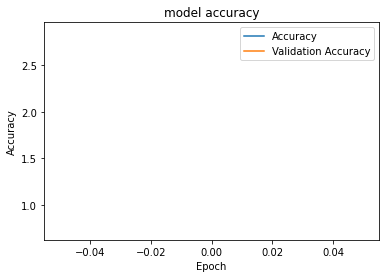

In [16]:
plt.plot(hitory.history["accuracy"])
plt.plot(hitory.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [14]:
model.save_weights("48_epochs_weights_v1.h5")

In [18]:
from glob import glob

In [20]:
len(glob("train_i/*/*"))

2152